In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
"""
Open and check the data (DATA large-vocab). 
The data is presented as pickle files. 

DATA.pkl has emg recordings from 10970 sentences. Each EMG recording is of the shape (31, T), where 31 is the number
of sensor nodes and T is the number of time steps. EMG data is sampled at 5000 Hertz.

LABELS.pkl has 10970 labels corresponding to each entry in DATA.pkl
"""

In [5]:
"""
Load the data files.
"""

with open("/mnt/dataDrive/emgFullCorpora/toUpload/DATA/dataLargeVocab.pkl", "rb") as file:
    DATA = pickle.load(file)

with open("/mnt/dataDrive/emgFullCorpora/toUpload/DATA/labelsLargeVocab.pkl", "rb") as file:
    LABELS = pickle.load(file)

In [6]:
print("Number of EMG recordings in large-vocabulary data:  ", len(DATA))
print("Shape of a EMG recording: ", DATA[0].shape)
print(" ")
print("Number of sentences: ", len(LABELS))

Number of EMG recordings in large-vocabulary data:   10970
Shape of a EMG recording:  (31, 18829)
 
Number of sentences:  10970


In [7]:
"""
z-normalize the data along time-dimension for each entry.
"""

normDATA = []
for i in range(len(DATA)):
    Mean = np.mean(DATA[i], axis = -1)
    Std = np.std(DATA[i], axis = -1)
    normDATA.append((DATA[i] - Mean[..., np.newaxis])/Std[..., np.newaxis])

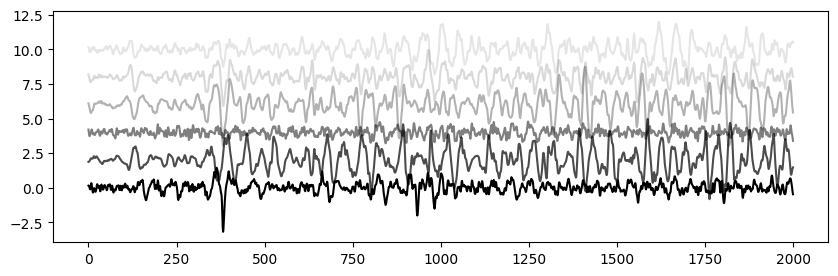

In [8]:
"""View a few EMG data segments."""

plt.figure(figsize = (10, 3))
plt.plot(normDATA[0][0, 500:2500], color = 'black')
plt.plot(normDATA[0][1, 500:2500] + 2, color = 'black', alpha = 0.7)
plt.plot(normDATA[0][2, 500:2500] + 4, color = 'black', alpha = 0.5)
plt.plot(normDATA[0][3, 500:2500] + 6, color = 'black', alpha = 0.3)
plt.plot(normDATA[0][4, 500:2500] + 8, color = 'black', alpha = 0.15)
plt.plot(normDATA[0][5, 500:2500] + 10, color = 'black', alpha = 0.1)
plt.show()

In [9]:
"""
Read the ground truth labels. First 8000 sentences are used for training, next 1000 for validation, and the remaining 1970 for test.
"""

for l in LABELS:
    print(l)

nuclear rockets can destroy airfields with ease
the best way to learn is to solve extra problems
the spray will be used in first division matches next season
our experiments positive outcome was unexpected
alimony harms a divorced mans wealth
she uses both names interchangeably
the misquote was retracted with an apology
critics fear the erosion of consumer protections and environmental standards
her lips moist and parted spoke his name
how do they turn out later
the eastern coast is a place for pure pleasure and excitement
please make your decision wisely to visit the beach
she encouraged her children to make their own halloween costumes
cleaned cloth must be protected against the redeposition of dispersed soil
both figures would go higher in later years
she always jokes about too much garlic in his food
if people were more generous there would be no need for welfare
the dimensions of these waves dwarf all our usual standards of measurement
the knifelike pain in his groin nearly brough

In [10]:
"""
Confirm there is no data leakage.

Of the 1970 sentences, there are 5 sentences which are same as in train and validation set. 
This occurred due to manual oversight during data curation. However, it is a very tiny fraction.
"""

count = 0
for i in range(1970):
    if LABELS[9000 + i] in LABELS[:9000]:
        count += 1

print(count)

5


In [11]:
"""
Duration of the whole data.
"""

timeDuration = 0
for i in range(len(DATA)):
    timeDuration += DATA[i].shape[1]/5000

print("Time duration (in minutes) of the large-vocab data is: ", timeDuration/60, "(approximately ", timeDuration/(60 * 60), " hours).")

Time duration (in minutes) of the large-vocab data is:  480.8386166666651 (approximately  8.013976944444417  hours).
